# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## **0. 데이터 불러오기**

In [1]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [2]:
# 데이터 타입 및 변수확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [3]:
# 결측치 확인
df.isna().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [4]:
# 결측치 비율 확인
df.isna().sum()/len(df)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.306723
Product_Category_3            0.691076
Purchase                      0.000000
dtype: float64

결측치의 비율이 높은 편이며, 각 상품의 카테고리를 다른 값으로 채우는 것은 부적절하기 때문에 제거

## **1. Preprocssing / EDA**

In [9]:
df.drop(columns=['User_ID', 'Product_ID', 'Product_Category_2', 'Product_Category_3'], inplace = True)
purchase = df['Purchase']
df = pd.concat([pd.get_dummies(df.iloc[:,:-1]), purchase], axis = 1)
df

,Occupation,Marital_Status,Product_Category_1,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,...,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Purchase
0,10,0,5,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,2010
1,10,0,7,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4483
2,10,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,7696
3,10,0,2,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,16429
4,10,0,3,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,5780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,7,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,11701
4994,1,1,8,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,2045
4995,13,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,4505
4996,0,1,12,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1413


## **2. KNN 구현 & 파라미터 튜닝**

In [10]:
X = df.drop(['Purchase'], axis=1)
y = df.Purchase

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3998, 20)
X_test shape: (1000, 20)
y_train shape: (3998,)
y_test shape: (1000,)


In [21]:
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# 탐색해볼 K 리스트:1~100 사이의 홀수 값들
k_list = [i for i in range(1, 100) if i%2 !=0] 
# cv_scores = []
train_accuracy = []
test_accuracy = []

for k in tqdm(k_list):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    # p=1: manhattan_distance, p=2: euclidean_distance, # p=l_p: minkoski_distance
    
    # 10-cross validation으로 탐색
    # scores: k값마다 10개의 값 누적 
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
    train_accuracy.append(knn.score(X_train, y_train))     
    test_accuracy.append(knn.score(X_test, y_test))
    
    # scores의 평균을 k값 마다의 성능 평가 결과로 사용
#     cv_scores.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:23<00:00,  2.13it/s]


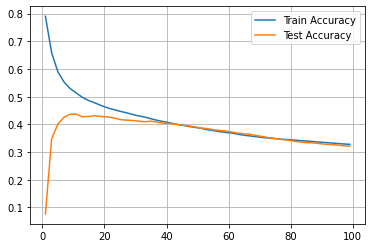

In [23]:
import matplotlib.pyplot as plt

plt.plot(k_list, train_accuracy, label = "Train Accuracy")
plt.plot(k_list, test_accuracy, label = "Test Accuracy")

plt.grid()
plt.legend()
plt.show()

In [26]:
train_top_10 = pd.Series(train_accuracy).sort_values(ascending=False).index[:20]
test_top_10 = pd.Series(test_accuracy).sort_values(ascending=False).index[:20]

print(train_top_10)
print(test_top_10)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')
Int64Index([4, 5, 8, 7, 9, 6, 10, 3, 11, 12, 13, 14, 15, 17, 16, 18, 19, 20, 2,
            21],
           dtype='int64')


## **3. Evaluation**

In [29]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)
print('test score : {:.3f}'.format(knn.score(X_test, y_test)))

test score : 0.436


In [30]:
results = knn.predict(X_test)
results

array([11088. ,  6448.1, 14382. ,  5705.8, 14107.9,  6180. , 13293.8,
        9360.9,  5518.8,  5297.8, 13329.8, 14213.1,  6678.6, 12091.3,
       13208. , 11113.1,  7337.7,  8265.8,  7296.1,  6207.7,  7512.6,
       12455.7,  9779.3,  6915.2,  6573. ,  8372.9, 13870.6,  7963.6,
         965.4,  7778. , 13062.4,  6793.9, 12382. , 10021.9,  7953.8,
        7420.5, 14028.7,  7766.8,  5574.4,  5424.3,  5808.2,  6444.1,
        5732.8,  7195.7,  6643.8, 13675.7,  5971.1, 14358.8,  9080.9,
        6012.5,  6977.4,  5821.8,  7683.4,  7771.8,  6531.9, 11942.7,
       13454.1, 15009. , 14788.9,  7494.8, 11051.5, 12143.2,  5511.5,
       11115.2, 13569.9,  6173.2, 12016.7, 14116.3, 13065.5,  6932.9,
        7803. ,  6509.6,  8513. , 14029.6, 12015.2,  8927. ,  8391.8,
        4655.7, 12979.4,  7521. ,  5678.9,  6298.7,  8095.1,  8369.3,
        8536.8,  6738.7, 12529.4,  7590.3,  1352.6,  9676.5, 13585.3,
        8296. , 14362. ,  8301.5, 12638.1,   968.7, 14462.9, 12879.8,
       14184. ,  462

In [31]:
pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total')

Predicted,196.3,235.8,562.5,965.4,968.7,1352.6,1515.2,1862.3,2096.8,2440.1,...,16044.2,16118.3,16130.9,16283.4,16304.1,16379.3,16390.1,17362.5,17396.2,total
Real,,,,,,,,,,,,,,,,,,,,,
25,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
197,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
248,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
249,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21220,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
21476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
